# An Introduction to Mining of Social Network Graphs

Konrad Talik, 2016.05.04

**based on**

*Rajaraman, Anand, and Jeffrey D. Ullman. Mining of massive datasets. Chapter 10*

---

## Table of contents

* [Social network](#social-network)

* [Network clustering](#network-clustering)

* [Community discovery](#community-discovery)

---

$$$$

$$$$

$$$$

$$$$

$$$$

$$$$

## Social network

Essential characteristics:

1. Collection of entities (people or other participants)

2. Relationship: binary (`friends`, `not friends`) or discrete (`friends`, `family`, `subscribers`, etc.)

3. Relationships tend to cluster (informal)


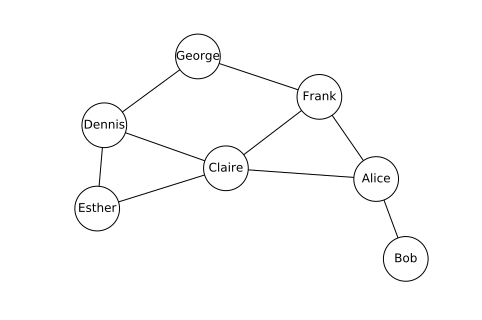

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
% config InlineBackend.figure_format = 'svg'

import networkx as nx

G = nx.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
names = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]

nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=2000, node_color='w')

## Varietes of social networks

1. Telephone networks (relations: call has been made, number of calls)

2. Email networks, relation approaches:

    * there was at least one email in one direction
    * there were emails in both directions
    * label edges as *weak* or *strong*

3. Collaboration networks, relation approaches:

    * researchers as nodes
        * one or more papers jointly
        * number of joint publications
    
    * papers as nodes

Approach depends on our needs and results in specific... communities.

![](img/political_blogs.png)

Data from nearly 1500 political blogs during the 2004 election, evenly balanced between conservative and liberal.

Every node is a blog and every edge is a reference.

Paper: L. A. Adamic and N. Glance. 2005. “The political blogosphere and the 2004 US Election”, in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem. 

## Multipartite graphs in real life

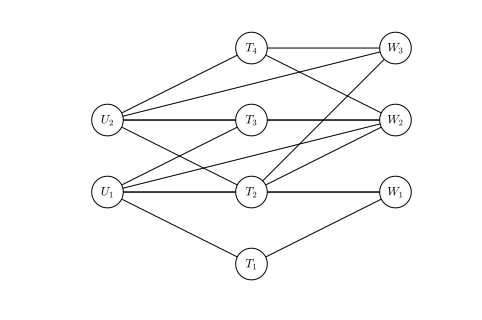

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

G = nx.Graph([
        # Users
        (0, 2), (0, 3), (0, 4), (0, 6), (0, 7),
        (1, 3), (1, 4), (1, 5), (1, 7), (1, 8),
        # Tags
        (2, 6), (3, 6), (3, 7), (3, 8), (4, 7),
        (5, 7), (5, 8)
])
names = [
    "$U_1$", "$U_2$",
    "$T_1$", "$T_2$", "$T_3$", "$T_4$",
    "$W_1$", "$W_2$", "$W_3$"
]

nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000,
    node_color=['w'],
    pos={
        v: p for v, p in enumerate([
        (0, 1), (0, 2),
        (1, 0), (1, 1), (1, 2), (1, 3),
        (2, 1), (2, 2), (2, 3)
    ])}
)

RDBMS analogy and representation variety example.

---

## Dual construction (Excercise 10.1.1)

It is possible to think of the edges of one graph $G$ as the nodes of another graph $G'$. We construct $G'$ from $G$ by the *dual construction*:

1. If $(X, Y)$ is an edge of $G$, then $XY$ is a node of $G'$

    (Note that $XY$ and $YX$ represent the same node of $G'$)
    
2. If $(X, Y)$ and $(X, Z)$ are edges of $G$, then in $G'$ there is an edge between $XY$ and $XZ$.

    (Edges from $G$ that have nodes in common, are nodes that have edges in $G'$)

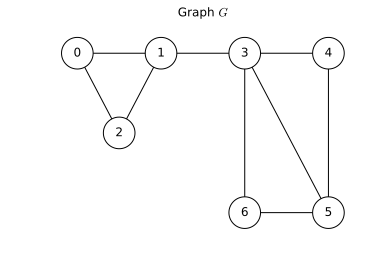

In [3]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["0", "1", "2", "3", "4", "5", "6"]

plt.title('Graph $G$')
nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000, node_color='w',
    pos={
        v: p for v, p in enumerate([
        (0, 0), (1, 0), (0.5, -0.5),
        (2, 0), (3, 0), (3, -1), (2, -1)
    ])}
)

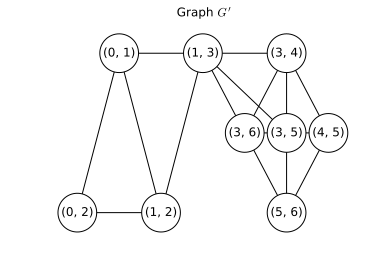

In [4]:
# Dual construction
Gp = nx.Graph()

# Ad. 1.
# If $(X, Y)$ is an edge of $G$, then $XY$ is a node of $G'$

# Take all (undirected) G edges as nodes in G'
g_edge_node = {e: i for i, e in enumerate(G.edges())}
Gp.add_nodes_from(g_edge_node.values())

# Ad. 2.
# If $(X, Y)$ and $(X, Z)$ are edges of $G$, then in $G'$
# there is an edge between $XY$ and $XZ$.

gp_edges = []
for XY in G.edges():
    for XZ in G.edges():
        if len(set(XY) & set(XZ)):
            gp_edges.append(
                (g_edge_node[XY], g_edge_node[XZ])
            )
        
Gp.add_edges_from(gp_edges)

names = [str(e) for e in G.edges()]

plt.title('Graph $G\'$')
nx.draw(
    Gp, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1500, node_color='w',
    pos={
        v: p for v, p in enumerate([
        (1, 0), (0.5, -1), (1.5, -1),
        (2, 0), (3, 0),
        (3, -0.5), (2.5, -0.5),
        (3.5, -0.5), (3, -1)
    ])}
)

### What is the interpretation of the edges of $G'$?

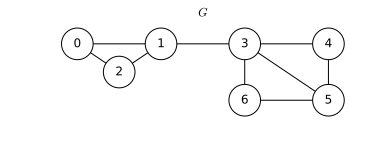

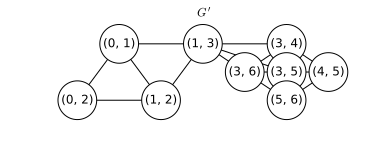

In [5]:
plt.subplot(211)
plt.title('$G$')
names = ["0", "1", "2", "3", "4", "5", "6"]
nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000, node_color='w',
    pos={
        v: p for v, p in enumerate([
        (0, 0), (1, 0), (0.5, -0.5),
        (2, 0), (3, 0), (3, -1), (2, -1)
    ])}
)
plt.show()

plt.subplot(212)
plt.title('$G\'$')
names = [str(e) for e in G.edges()]
nx.draw(
    Gp, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1500, node_color='w',
    pos={
        v: p for v, p in enumerate([
        (1, 0), (0.5, -1), (1.5, -1),
        (2, 0), (3, 0),
        (3, -0.5), (2.5, -0.5),
        (3.5, -0.5), (3, -1)
    ])}
)
plt.show()

### How is the degree of $XY$ in $G'$ related to the degrees of $X$ and $Y$ in $G$?

$$\text{deg}(XY) = \text{deg}(X) + \text{deg}(Y) - 1$$

### The number of edges of $G'$

$$|E_{G'}| = \frac{\sum_{v \in G} ~ \text{deg}(v)}{2}$$

## Clustering

* social networks contain communities of entities that are connected by many edges, e.g.:
    * groups of friends at school
    * groups of researches of the same topic
    
* we can cluster the graph to identify communities

## Distance measure

Methods

* when edges have labels, use them as a distance measure
* if not (it's a "friends" graph):
    * if there is an edge: $0$, else: $1$
        * note: violates triangle inequality
        * the same is for ($1$ and $∞$)

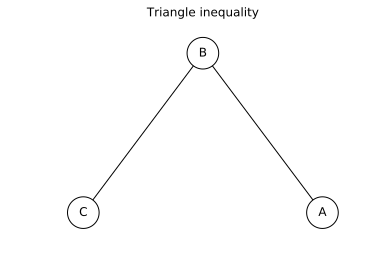

In [6]:
G = nx.Graph([(0,1), (1,2)])
names = ["A", "B", "C"]

plt.title('Triangle inequality')
nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000, node_color='w',
    pos={
        v: p for v, p in enumerate([
        (1, 0), (0.5, 1), (0, 0),
    ])}
)

## Standard clustering methods

* hierarchical
* centroid-based (point-assignment)

There are several problems with them.

## Hierachical clustering

Problem example

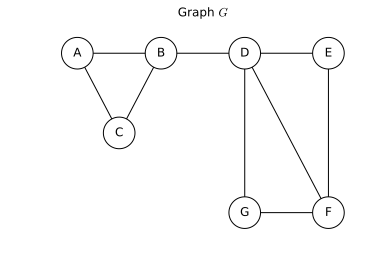

In [7]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]

plt.title('Graph $G$')
nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000, node_color='w',
    pos={
        v: p for v, p in enumerate([
        (0, 0), (1, 0), (0.5, -0.5),
        (2, 0), (3, 0), (3, -1), (2, -1)
    ])}
)

Communities: $\{A, B, C\}$ and $\{D, E, F, G\}$

$\{D, E, F\}$ are $\{D, F, G\}$ also subcommunities of $\{D, E, F, G\}$

**Problem**

* We are likely to put $B$ and $D$ to one community with hierarchical clustering.

**Reason**

* Suppose we are choosing from $B$, then $D$ is as close to $B$ as $A$ and $C$ are

* There is $1/9$ probability that the first step will combine $B$ and $D$ to one cluster

**Solutions**

* Run clustering number of times and pick the most coherent clusters

* Use more sophisticated method for measuring the distance

**Reality**

* In large graphs we will do mistakes with selection of the first nodes

## Point assignment

**Problem**

* Again, related to the fact that all edges are at the same distance.

** Problem example with k-means approach**

**1. Pick a number of clusters**: $k = 2$

**2. Pick two starting nodes at random**

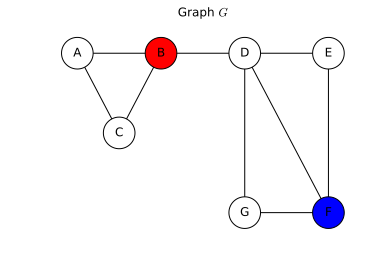

In [8]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]

plt.title('Graph $G$')
nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000,
    node_color=['w', 'r', 'w', 'w', 'w', 'b', 'w'],
    pos={
        v: p for v, p in enumerate([
        (0, 0), (1, 0), (0.5, -0.5),
        (2, 0), (3, 0), (3, -1), (2, -1)
    ])}
)

**3. Assign neighbours to starting nodes**

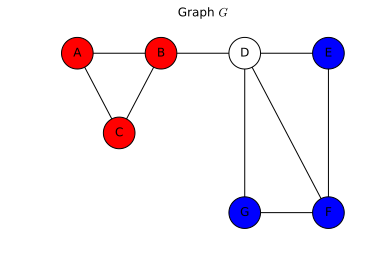

In [9]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]

plt.title('Graph $G$')
nx.draw(
    G, labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000,
    node_color=['r', 'r', 'r', 'w', 'b', 'b', 'b'],
    pos={
        v: p for v, p in enumerate([
        (0, 0), (1, 0), (0.5, -0.5),
        (2, 0), (3, 0), (3, -1), (2, -1)
    ])}
)

**Problem**

* When selecting $D$ in the terms of $B$ and $F$ clusters, we have the same distance to both clusters

**Solutions**

* Postpone $D$ assignment until other nodes are assigned and use some clever method, e.g. calculate shortest average distance to cluster members

**Reality**

* In large graphs we will do mistakes with selection of the first nodes

## Betweenness (betweenness centrality)

**Idea of improving classic clustering methods**

* Finding edges that are *least likely* to be inside a community

**Def.** Betweenness of an edge $(a, b)$ is the number of pairs of nodes $x$ and $y$ such that the edge $(a, b)$ lies on the shortest path between $x$ and $y$.

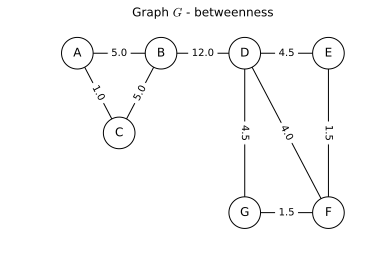

In [10]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
pos = pos={
    v: p for v, p in enumerate([
    (0, 0), (1, 0), (0.5, -0.5),
    (2, 0), (3, 0), (3, -1), (2, -1)
])}

bt = nx.centrality.edge_betweenness(G, normalized=False)
edge_labels = {k : '%s' % bt[k] for k in bt}

plt.figure()

plt.title('Graph $G$ - betweenness')

nx.draw(
    G, pos=pos,
    labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1000, node_color='w')

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=bt)

plt.show()

Betweenness value tells if an edge runs between two different communities.

**Notes**

* In graph $G$ the edge $(B, D)$ has the highest betweenness, because this edge is on every shortest path between $\{A, B, C\}$ and $\{D, E, F, G\}$. This gives $3 \times 4 = 12$.

* In contrast, $(D, F)$ is on only four shortest paths: from $\{A, B, C, D\}$ to $F$.

## Girvan-Newman algorithm

Algorithm that calculates graph edge betweenness

**1. Do a BFS of the graph from selected root $X$**


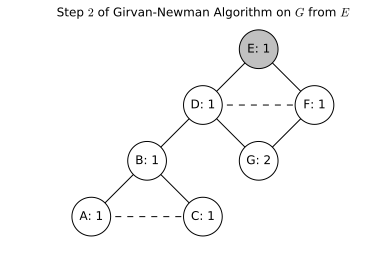

In [11]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
names = [n + ': 2' if n == 'G' else n + ': 1' for n in names]
pos = {
    v: p for v, p in enumerate([
    (0, 0), (0.5, 1), (1, 0),
    (1, 2), (1.5, 3), (2, 2), (1.5, 1)
])}

plt.figure()

plt.title(
    'Step $2$ of Girvan-Newman Algorithm on $G$ from $E$')

nx.draw(
    G, pos=pos,
    node_color=['w', 'w', 'w', 'w', 'silver', 'w', 'w'],
    edgelist=[
        (0, 1), (1, 2), (1, 3), (3, 6), (5, 6),
        (4, 5), (4, 3)],
    labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1500)

nx.draw_networkx_edges(
    G, pos,
    edgelist=[(3, 5), (0, 2)],
    style='dashed')

plt.show()

**2. Label each node by the number of shortest paths that reach it from the root.**

* Start by labeling the root 1. Then, from the top down, label each node by the sum of the labels of its parents.

**3. For each edge $e$ calculate the sum over all nodes $Y$ of the *fraction* of shortest paths from the root $X$ to $Y$ that go through $e$.**

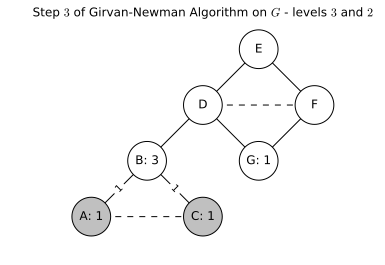

In [12]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A: 1", "B: 3", "C: 1", "D", "E", "F", "G: 1"]
pos = {
    v: p for v, p in enumerate([
    (0, 0), (0.5, 1), (1, 0),
    (1, 2), (1.5, 3), (2, 2), (1.5, 1)
])}

plt.figure()

plt.title(
    'Step $3$ of Girvan-Newman Algorithm on $G$ - levels $3$ and $2$')

nx.draw(
    G, pos=pos,
    node_color=['silver', 'w', 'silver', 'w', 'w', 'w', 'w'],
    edgelist=[
        (0, 1), (1, 2), (1, 3), (3, 6), (5, 6),
        (4, 5), (4, 3)],
    labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1500)

nx.draw_networkx_edges(
    G, pos,
    edgelist=[(3, 5), (0, 2)],
    style='dashed')

edge_labels = {(0, 1): '1', (1, 2): '1'}
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels)

plt.show()

**3. For each edge $e$ calculate the sum over all nodes $Y$ of the *fraction* of shortest paths from the root $X$ to $Y$ that go through $e$.**

* Start from the bottom


* Calculate a *credit* for every node and edge like this:

**3.1. Each leaf node in BFS gets a credit of $1$.**

**3.2. Each node that is not a leaf gets a credit of $1$ plus the sum of credits of the children**
    
**3.3. Each edge $e$ receives credit proportional to the fraction of shortest paths from the root to the children of $e$**

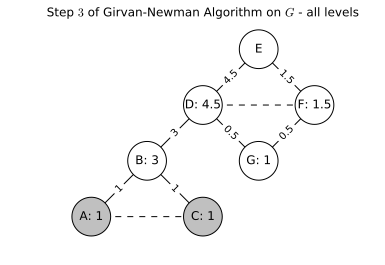

In [13]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = [
    "A: 1", "B: 3", "C: 1", "D: 4.5", "E", "F: 1.5", "G: 1"]
pos = {
    v: p for v, p in enumerate([
    (0, 0), (0.5, 1), (1, 0),
    (1, 2), (1.5, 3), (2, 2), (1.5, 1)
])}

plt.figure()

plt.title(
    'Step $3$ of Girvan-Newman Algorithm on $G$ - all levels')

nx.draw(
    G, pos=pos,
    node_color=['silver', 'w', 'silver', 'w', 'w', 'w', 'w'],
    edgelist=[
        (0, 1), (1, 2), (1, 3), (3, 6), (5, 6),
        (4, 5), (4, 3)],
    labels={v: names[v] for v in range(len(names))},
    node_shape='o', node_size=1500)

nx.draw_networkx_edges(
    G, pos,
    edgelist=[(3, 5), (0, 2)],
    style='dashed')

bt = nx.centrality.edge_betweenness(G, normalized=False)
edge_labels = {k : '%s' % bt[k] for k in bt}
edge_labels.update({
    (0, 1): '1', (1, 2): '1', (1, 3): '3',
    (3, 6): '0.5', (5, 6): '0.5',
    (3, 5): '', (0, 2): ''
})

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels)

plt.show()

**3.3. Each edge $e$ receives credit proportional to the fraction of shortest paths from the root to the children of $e$, that means:**

* Let $e$ enter the node $Z$ from level above
* Let $Z$ have parents $Y_1, Y_2, ..., Y_k$
* Let $p_i$ be the number of shortest paths from the root to $Y_i$ (from Step 2)


* Then the credit for the edge $(Y_i, Z)$ is:

$$\frac{\text{credit}(Z) \times p_i}{\sum_{j=1}^{k} p_j}$$

**4. Repeat this algorithm for every node as root.**

**5. Sum up the credits for each edge and divide them by two, because every shortest path was discovered twice - once when each edge endpoints is the root.**

## Using betweenness to find communities

* betweenness as a distance measure

* we can cluster the edges with a respect to increasing betweenness

This is often implemented as process of edge removal.

**Example**

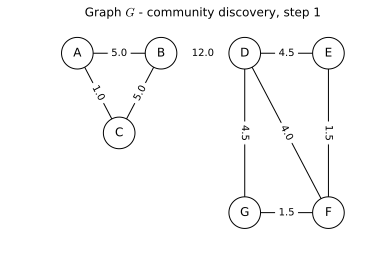

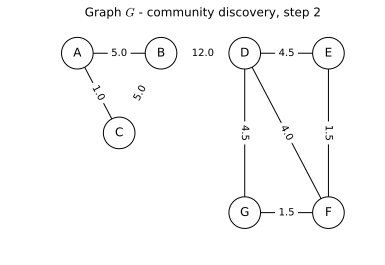

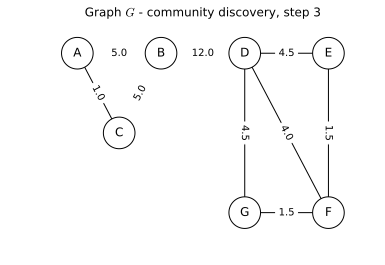

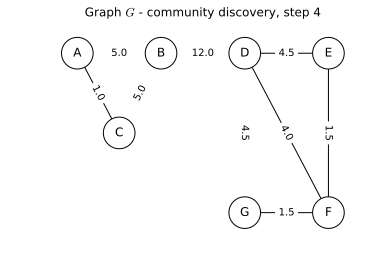

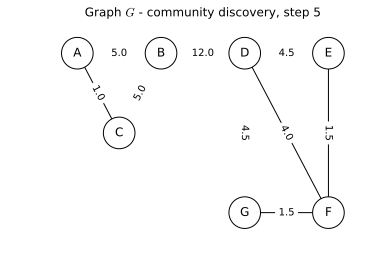

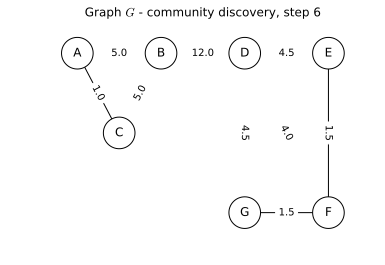

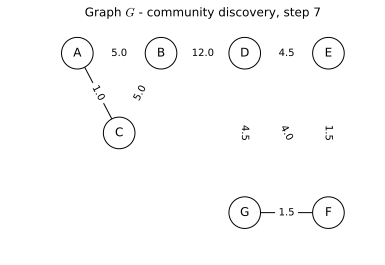

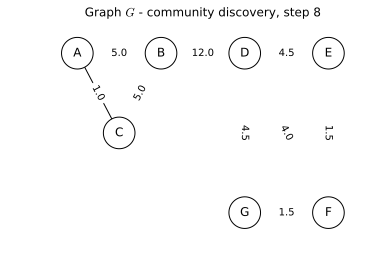

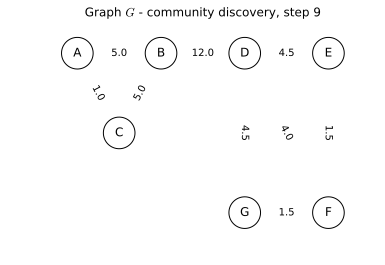

In [14]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
pos = pos={
    v: p for v, p in enumerate([
    (0, 0), (1, 0), (0.5, -0.5),
    (2, 0), (3, 0), (3, -1), (2, -1)
])}

base_bt = nx.centrality.edge_betweenness(G, normalized=False)

step = 0

for edge, btw in sorted(
        base_bt.items(), reverse=True, key=lambda tup: float(tup[1])):
    G.remove_edge(edge[0], edge[1])
    
    step += 1

    plt.figure()

    plt.title('Graph $G$ - community discovery, step %s' % step)

    nx.draw(
        G, pos=pos,
        labels={v: names[v] for v in range(len(names))},
        node_shape='o', node_size=1000, node_color='w')

    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=base_bt)

    plt.show()

## Speeding up the betweennes calculation

**Complexity:** $O(ne)$ - for a graph of $n$ nodes and $e$ edges

(For every node as root we perform $n$ computations of BFS, which takes $O(e)$ time)

**Possible solution:** Select a random subset of root nodes and compute for them. Based on this we can get a good approximation to the betweennes of each edge.

## Example

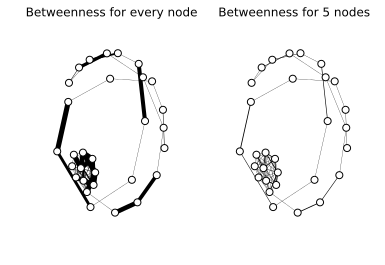

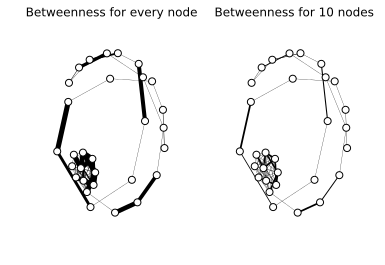

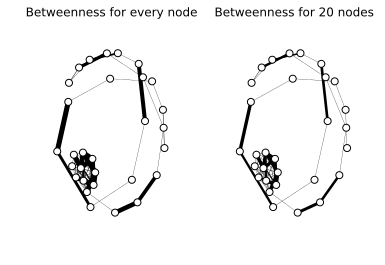

In [102]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
pos = pos={
    v: p for v, p in enumerate([
    (0, 0), (1, 0), (0.5, -0.5),
    (2, 0), (3, 0), (3, -1), (2, -1)
])}

G = nx.lollipop_graph(10, 20)
pos = nx.fruchterman_reingold_layout(G)

base_bt = nx.centrality.edge_betweenness(G, normalized=True)

step = 0

for root_nodes in [5, 10, 20]:
    
    base_bt = nx.centrality.edge_betweenness(G, normalized=True)

    plt.figure()
    
    plt.subplot(121)
    
    plt.title('Betweenness for every node')

    nx.draw(
        G, pos=pos, edgelist=[],
        node_shape='o', node_size=50, node_color='w')

    nx.draw_networkx_edges(
        G, pos, width=map(lambda x: max(0.25, 10*float(x)), base_bt.values())
    )
    
    
    base_bt = nx.centrality.edge_betweenness(G, normalized=True, k=root_nodes)
    
    plt.subplot(122)
    
    plt.title('Betweenness for %s nodes' % root_nodes)

    nx.draw(
        G, pos=pos, edgelist=[],
        node_shape='o', node_size=50, node_color='w')

    nx.draw_networkx_edges(
        G, pos, width=map(lambda x: max(0.25, 10*float(x)), base_bt.values())
    )

    plt.show()

## Example - larger graph

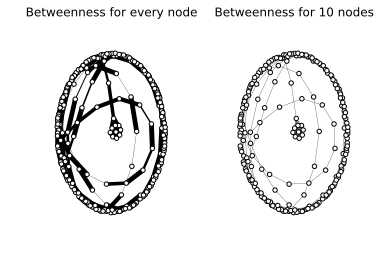

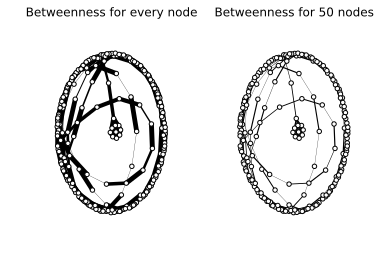

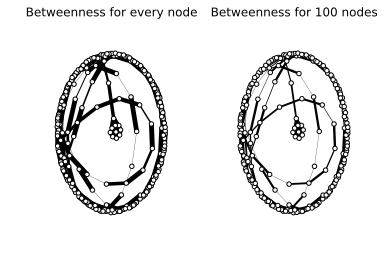

In [107]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
pos = pos={
    v: p for v, p in enumerate([
    (0, 0), (1, 0), (0.5, -0.5),
    (2, 0), (3, 0), (3, -1), (2, -1)
])}

G = nx.lollipop_graph(10, 200)
pos = nx.fruchterman_reingold_layout(G)

base_bt = nx.centrality.edge_betweenness(G, normalized=True)

step = 0

for root_nodes in [10, 50, 100]:
    
    base_bt = nx.centrality.edge_betweenness(G, normalized=True)

    plt.figure()
    
    plt.subplot(121)
    
    plt.title('Betweenness for every node')

    nx.draw(
        G, pos=pos, edgelist=[],
        node_shape='o', node_size=20, node_color='w')

    nx.draw_networkx_edges(
        G, pos, width=map(lambda x: max(0.25, 10*float(x)), base_bt.values())
    )
    
    
    base_bt = nx.centrality.edge_betweenness(G, normalized=True, k=root_nodes)
    
    plt.subplot(122)
    
    plt.title('Betweenness for %s nodes' % root_nodes)

    nx.draw(
        G, pos=pos, edgelist=[],
        node_shape='o', node_size=20, node_color='w')

    nx.draw_networkx_edges(
        G, pos, width=map(lambda x: max(0.25, 10*float(x)), base_bt.values())
    )

    plt.show()

## Direct discovery of communities

In the previous section we searched for communities by partitioning all the individuals in a social network

* Pros

    * relatively efficient
    
* Cons

    * not possible to place an individual in two different communities
    
In direct discovery we try to discover communities directly by looking for subsets of the nodes that **have a relatively large number of edges among them**.

## Finding cliques

* We can find a large clique and start from it

* This task is not easy

    * Maximal clique finding problem is NP-complete
    
    * Approximating the maximal clique is hard, which makes it harder

## Complete bipartite graphs

**Analogy**

* Complete bipartite graphs (CBG) are as desired as cliques

* CBG is a subgraph of general bipartite graph (just like clique is a subgraph of general graph)

**Problem**

* It is not possible to guarantee that a graph with many edges necessarily has a large clique

**No problem**

* It is possible to guarantee that a bipartite graph with *many edges* has a complete bipartite subgraph.

* We can try to find a bipartite graph and start from it

**Example:** (Divide and conquer)

* Divide the nodes into two groups randomly

* Half of each community should fall into each group


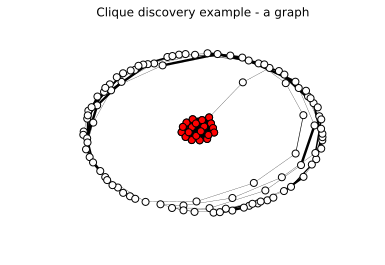

In [152]:
G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
pos = pos={
    v: p for v, p in enumerate([
    (0, 0), (1, 0), (0.5, -0.5),
    (2, 0), (3, 0), (3, -1), (2, -1)
])}

G = nx.lollipop_graph(20, 100)
pos = nx.fruchterman_reingold_layout(G)
cliques = list(nx.find_cliques(G))

base_bt = nx.centrality.edge_betweenness(G, normalized=True)

plt.figure()
    
plt.title('Clique discovery example - a graph')

nx.draw(
    G, pos=pos, edgelist=[],
    node_shape='o', node_size=50, node_color='w')

nx.draw_networkx_edges(
    G, pos, width=map(lambda x: max(0.25, 5*float(x)), base_bt.values())
)

nx.draw_networkx_nodes(
    G, pos, nodelist=cliques[0], color='r', node_size=50
)

base_bt = nx.centrality.edge_betweenness(G, normalized=True, k=root_nodes)

plt.show()


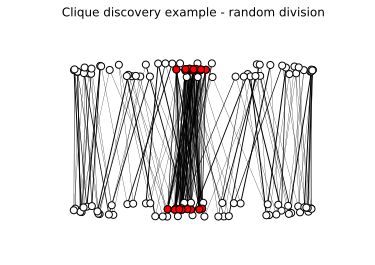

In [154]:
import numpy as np
from copy import deepcopy

G = nx.Graph([(0,1), (0,2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 3), (5, 6), (6, 3)])
names = ["A", "B", "C", "D", "E", "F", "G"]
pos = pos={
    v: p for v, p in enumerate([
    (0, 0), (1, 0), (0.5, -0.5),
    (2, 0), (3, 0), (3, -1), (2, -1)
])}

G = nx.lollipop_graph(20, 100)
pos = nx.fruchterman_reingold_layout(G)
cliques = list(nx.find_cliques(G))

base_bt = nx.centrality.edge_betweenness(G, normalized=True)

# Shuffle nodes randomly
node_shuffle = deepcopy(G.nodes())
np.random.shuffle(node_shuffle)

# and select every second node as a second part of the division
for n in xrange(0, len(node_shuffle), 2):
    pos[n] = pos[n] + (0, 10)

plt.figure()
    
plt.title('Clique discovery example - random division')

nx.draw(
    G, pos=pos, edgelist=[],
    node_shape='o', node_size=50, node_color='w')

nx.draw_networkx_edges(
    G, pos, width=map(lambda x: max(0.25, 2*float(x)), base_bt.values())
)

nx.draw_networkx_nodes(
    G, pos, nodelist=cliques[0], color='r', node_size=50
)

base_bt = nx.centrality.edge_betweenness(G, normalized=True, k=root_nodes)

plt.show()
